In [1]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import math

In [2]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    # Locations in block units
    data["locations"] = [
      (11.0146773, 106.6495454), (10.964891, 106.71357),
    (10.961647, 106.70954), (10.958996, 106.71356),
    (10.948934, 106.69534), (10.94789, 106.693146),
    (11.00879, 106.67995), (10.999449, 106.65931),
    (11.014755, 106.64786), (11.014696, 106.64815),
    (11.03341, 106.63762), (10.988107, 106.74114),
    (10.987459, 106.74273), (11.039376, 106.758),
    (11.083669, 106.7659), (11.080461, 106.736855),
    (11.048178, 106.72356), (11.205845, 106.51275),
    (11.131791, 106.53344), (11.1247, 106.57156),
    (11.075224, 106.56542), (11.07758, 106.57026),
    (11.100986, 106.54193), (11.034766, 106.63139),
    (11.270267, 106.63862), (11.263334, 106.650055),
    (11.229179, 106.73001), (11.204655, 106.72134),
    (11.253958, 106.78244), (11.290918, 106.7922),
    (11.237679, 106.735146), (11.332633, 106.14723),
    (11.290338, 106.79161), (11.294968, 106.80774),
    (11.268309, 106.77148), (10.976503, 106.75432),
    (10.976248, 106.75594), (10.97346, 106.759865),
    (10.97022, 106.75526), (10.969177, 106.75475),
    (10.943775, 106.74046), (10.94245, 106.736305),
    (10.941522, 106.698906), (10.957556, 106.70433),
    (10.969068, 106.659805), (10.959417, 106.66403),
    (11.133101, 106.533455),(11.133423, 106.53386),
    (11.200936, 106.57095), (11.222219, 106.561424),
    (11.028857, 106.655655), (10.977585, 106.74749),
    (10.977782, 106.74611), (10.977645, 106.74676),
    (10.978416, 106.75919), (10.979644, 106.759735),
    (10.981393, 106.76119), (10.938545, 106.698235),
    (10.95188, 106.67953), (10.962132, 106.69223),
    (10.954527, 106.66192), (10.966768, 106.65953),
    (10.978481, 106.65622), (10.991326, 106.64408),
    (11.023103, 106.63206), (11.02098, 106.619415),
    (11.182995, 106.71187), (11.183594, 106.71497),
    (11.183486, 106.71507), (11.207706, 106.72066),
    (11.234503, 106.736), (11.291158, 106.79117),
    (11.290504, 106.79104), (11.344159, 106.63992),
    (11.345298, 106.62772), (11.356915, 106.61145),
    (11.135972, 106.54794), (11.132573, 106.519226),
    (11.142088, 106.51488), (11.027397, 106.612976),
    (11.02878, 106.62956), (11.028675, 106.62947),
    (11.023936, 106.632065),(11.007817, 106.63416),
    (11.009502, 106.633415), (11.009468, 106.63149),
    (10.973461, 106.759865), (10.99548, 106.73079),
    (11.076361, 106.56778), (11.134502, 106.53781),
    (11.134354, 106.53733), (10.993906, 106.73216),
    (10.9771, 106.75024), (11.012886, 106.63239),
    (11.065952, 106.72882), (10.999344, 106.656555),
    (11.142497, 106.576454), (11.02418, 106.63855),
    (10.963712, 106.67928), (10.966048, 106.863266),
    (11.017475, 106.63009), (11.011568, 106.63287),
    (11.134405, 106.538025), (11.030714, 106.62854),
    (11.036123, 106.641335), (10.975972, 106.68141),
    (10.968155, 106.682884), (10.961209, 106.67332),
    (11.065242, 106.58506), (11.07695, 106.56882),
    (11.078062, 106.57105), (11.078304, 106.5716),
    (11.078381, 106.571556), (11.314083, 106.491714),
    (11.032807, 106.63429), (11.01625, 106.678055),
    (11.016832, 106.6803), (11.016721, 106.6802),
    (10.993489, 106.68418), (10.978416, 106.68815),
    (10.975808, 106.761055), (10.97396, 106.75946),
    (11.001884, 106.73286), (11.18948, 106.72476),
    (11.289767, 106.79895), (11.145058, 106.57974),
    (11.343192, 106.6094), (11.262747, 106.7665),
    (11.262796, 106.76659), (11.2216, 106.698494),
    (11.22144, 106.69863), (11.023637, 106.678665),(10.985893, 106.69274)
]
    data["num_vehicles"] = 1
    data["depot"] = 0
    return data

In [12]:
from haversine import haversine, Unit

def compute_haversine_distance_matrix(locations):
    """Creates callback to return distance between points."""
    distances = {}
    for from_counter, from_node in enumerate(locations):
        distances[from_counter] = {}
        for to_counter, to_node in enumerate(locations):
            if from_counter == to_counter:
                distances[from_counter][to_counter] = 0
            else:
                # Euclidean distance
                distances[from_counter][to_counter] = int(haversine(from_node, to_node, unit=Unit.KILOMETERS))
    return distances


In [13]:

def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()}")
    index = routing.Start(0)
    plan_output = "Route:\n"
    route_distance = 0
    list_of_nodes = []
    while not routing.IsEnd(index):
        plan_output += f" {manager.IndexToNode(index)} ->"
        list_of_nodes.append(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += f" {manager.IndexToNode(index)}\n"
    list_of_nodes.append(manager.IndexToNode(index))
    plan_output += f"Objective: {route_distance}m\n"
    print(plan_output)
    return list_of_nodes




In [14]:
data = create_data_model()

# Create the routing index manager.
manager = pywrapcp.RoutingIndexManager(
    len(data["locations"]), data["num_vehicles"], data["depot"]
)

# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)

distance_matrix = compute_haversine_distance_matrix(data["locations"])

def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return distance_matrix[from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

# Define cost of each arc.
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Setting first solution heuristic.
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
)
# Solve the problem.
solution1  = routing.SolveWithParameters(search_parameters)

# Print solution on console.
print("Solution 1")
if solution1:
    sol1=print_solution(manager, routing, solution1)

search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
search_parameters.time_limit.seconds = 30
search_parameters.log_search = True
solution2 = routing.SolveWithParameters(search_parameters)

# Print solution on console.
print("Solution 2")
if solution2:
    sol2=print_solution(manager, routing, solution2)


Solution 1
Objective: 251
Route:
 0 -> 9 -> 8 -> 64 -> 80 -> 81 -> 23 -> 10 -> 104 -> 114 -> 103 -> 82 -> 97 -> 50 -> 131 -> 117 -> 116 -> 115 -> 6 -> 118 -> 7 -> 95 -> 63 -> 62 -> 44 -> 61 -> 45 -> 60 -> 58 -> 59 -> 43 -> 2 -> 3 -> 1 -> 40 -> 41 -> 57 -> 42 -> 5 -> 4 -> 107 -> 98 -> 106 -> 105 -> 119 -> 132 -> 91 -> 122 -> 87 -> 12 -> 11 -> 92 -> 54 -> 121 -> 120 -> 86 -> 56 -> 55 -> 37 -> 39 -> 38 -> 36 -> 51 -> 53 -> 52 -> 35 -> 99 -> 13 -> 16 -> 94 -> 15 -> 14 -> 123 -> 68 -> 67 -> 66 -> 69 -> 27 -> 26 -> 70 -> 30 -> 28 -> 124 -> 33 -> 29 -> 32 -> 71 -> 72 -> 34 -> 127 -> 128 -> 129 -> 130 -> 25 -> 24 -> 73 -> 74 -> 75 -> 126 -> 113 -> 31 -> 17 -> 49 -> 48 -> 96 -> 125 -> 19 -> 76 -> 18 -> 46 -> 47 -> 89 -> 102 -> 90 -> 77 -> 78 -> 22 -> 20 -> 21 -> 88 -> 110 -> 111 -> 112 -> 109 -> 108 -> 79 -> 65 -> 100 -> 101 -> 83 -> 84 -> 85 -> 93 -> 0
Objective: 251m

Solution 2
Objective: 248
Route:
 0 -> 9 -> 50 -> 131 -> 117 -> 116 -> 115 -> 6 -> 7 -> 95 -> 63 -> 62 -> 44 -> 61 -> 45 -> 60

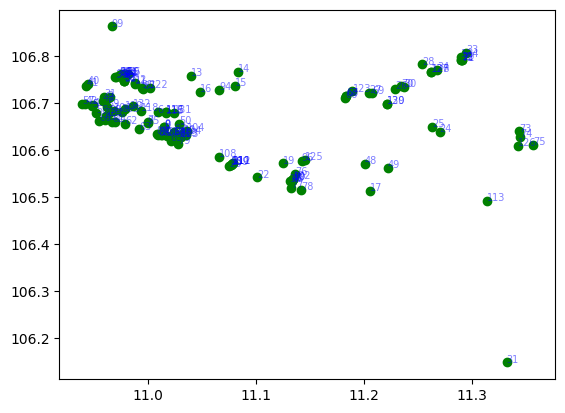

In [15]:
# plot solution :
import matplotlib.pyplot as plt
import numpy as np
x = [i[0] for i in data["locations"]]
y = [i[1] for i in data["locations"]]
for i in range(len(x)):
    plt.text(x[i],y[i],str(i),alpha = 0.5,fontsize = 7,color = 'b')
plt.scatter(x,y,color = 'g')
plt.show()


In [16]:
def plot_solution(sol):
    x = [data["locations"][i][0] for i in sol]
    y = [data["locations"][i][1] for i in sol]
    x_index = [i[0] for i in data["locations"]]
    y_index = [i[1] for i in data["locations"]]
    for i in range(len(x)-1):
        plt.text(x_index[i],y_index[i],str(i),alpha = 0.5,fontsize = 7,color = 'b')
    plt.plot(x,y,marker = 'o',color = 'g')
    plt.show()

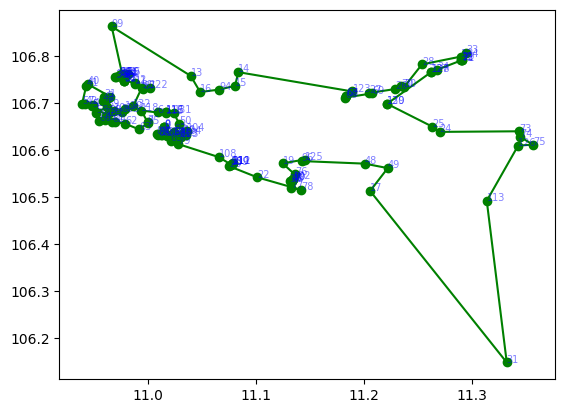

None

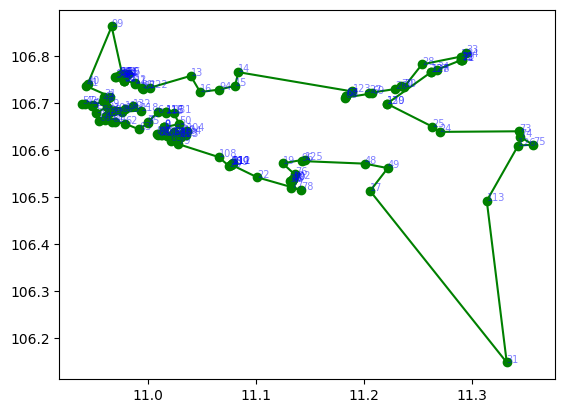

None

In [17]:
display(plot_solution(sol1))
display(plot_solution(sol2))